# Figure 2: plot correlation between model predictions and logFC in Svensson genes
- looks at scores of all 14,707 genes from embeddings, regardless of label

Figure items:
* 'score_logfc_607.png' - plots log fold change (log axis) versus score from final trained model for all 607 genes that overlap with the 14,707 embedded genes from the set of 909 sent by Dr. Svensson
* 'score_logfc_200.png' - same as above, but just looking at the top 200 genes by log fold change

In [5]:
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
from scipy.stats import spearmanr, pearsonr

plt.style.use('ggplot')

## 1. Score all genes using trained model

In [6]:
scores = pd.read_csv('../../results/final_model_svc/all_gene_scores.csv', index_col=0)
scores = pd.DataFrame(scores).sort_values('score', ascending=False)

## 2. Load svensson gene scores

* using entire list of 909 genes from Dr. Svenssion (rather than the list of top 200 that are used for testing)

In [7]:
svensson_909 = pd.read_csv('../../data/svensson_909.csv').dropna()
svensson_909.index = svensson_909['Gene'].str.upper()

## 3. Join scores and svensson genes

607 of 909 genes from Dr. Svensson are present in 14,707 embedded genes

In [8]:
scores_fc = scores.join(svensson_909,  how='inner').iloc[:, [0,4]]
scores_fc.columns = ['scores', 'logfc']

In [19]:
scores_fc.to_csv('model_scores_logfc.csv')

## 4. Correlation and plot

In [10]:
spearmanr(scores_fc['scores'], scores_fc['logfc'])

SpearmanrResult(correlation=0.4429130671136303, pvalue=1.4911787838224568e-30)

In [11]:
pearsonr(scores_fc['scores'], scores_fc['logfc'])

(0.19666303695068182, 1.0446390083867008e-06)

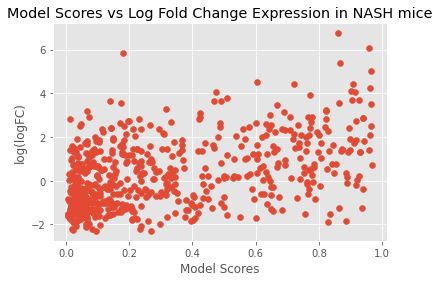

In [16]:
# Plot all 607 
plt.scatter(scores_fc['scores'], np.log(scores_fc['logfc']))
plt.title('Model Scores vs Log Fold Change Expression in NASH mice')
plt.xlabel('Model Scores')
plt.ylabel('log(logFC)')
plt.savefig('score_logfc_607.png')

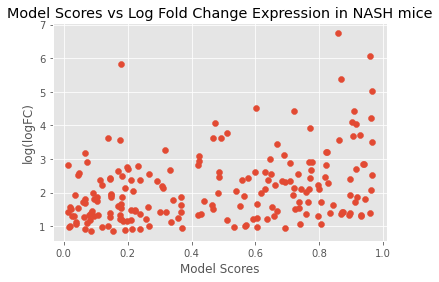

In [13]:
# Plot top 200 (by logfc) overlapping
top_200 = scores_fc.sort_values('logfc', ascending=False)[0:200]

plt.scatter(top_200['scores'], np.log(top_200['logfc']))
plt.title('Model Scores vs Log Fold Change Expression in NASH mice')
plt.xlabel('Model Scores')
plt.ylabel('log(logFC)')
plt.savefig('score_logfc_200.png')

In [17]:
spearmanr(top_200['scores'], top_200['logfc'])

SpearmanrResult(correlation=0.3314242856071402, pvalue=1.636087082049409e-06)

In [18]:
pearsonr(top_200['scores'], top_200['logfc'])

(0.1873866858409136, 0.007883590675135525)